# Files needed
* the pickle file containing the clipscores
* prompts file

# This notebook is intended to generate the visualization of the computed clipscores

# Imports

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Input paths

In [2]:
#input = '/kaggle/input/clipscorelistdalle2/clipScoreDictionary_DALL-E 2.pkl'
#input_prompt_file = '/kaggle/input/jpprompts/prompts.txt'
numberOfClipVariants = 4
pklPathClipScoreSDXL = '/kaggle/input/clipscorelistsdxl/clipScoreList_SDXL.pkl'
pklPathClipScoreSDXLTurbo = '/kaggle/input/clipscoressdxlturbo/clipScoreList_SDXL_TURBO.pkl'
pklPathClipScoreFluxSchnell = '/kaggle/input/clipscoresfluxschnell/clipScoreList_FLUX_SCHNELL.pkl'
pklPathClipScoreDALLE = '/kaggle/input/clipscorelistdalle2/clipScoreDictionary_DALL-E 2.pkl'
input_prompt_file = '/kaggle/input/jpprompts/prompts.txt'

# utils

In [3]:
#convert pickle to dictionary 
def convertPickleToDictionary(filePath):
    with open(filePath, 'rb') as f:
        dict = pickle.load(f)
    return dict

#extract keys and values from the input dictionary
def extractDictionaryKeyAndValues(inputDictionary):
    dictKeys = list(inputDictionary.keys())
    dictValues = list(inputDictionary.values())
    return dictKeys, dictValues

# Read the pickle file

In [4]:
dictClipScoreSDXL = convertPickleToDictionary(pklPathClipScoreSDXL)
dictClipScoreSDXLTurbo = convertPickleToDictionary(pklPathClipScoreSDXLTurbo)
dictClipScoreDALLE = convertPickleToDictionary(pklPathClipScoreDALLE)
dictClipScoreFluxSchnell = convertPickleToDictionary(pklPathClipScoreFluxSchnell)

/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


# Read the prompt file

In [5]:
with open(input_prompt_file) as file:
    # add only those entries in the list from the prompt file that do not have '#' identifier
    prompt_list = [line.rstrip() for line in file if '#' not in line]
prompts = [val.split(' : ')[-1] for val in prompt_list]
prompt_length = [len(val.split(' ')) for val in prompts]
print(prompt_length)

[7, 5, 4, 5, 4, 8, 11, 9, 8, 10, 10, 10, 5, 8, 4, 6, 9, 10, 12, 9, 16, 11, 4, 11, 13, 10, 7, 8, 4, 10, 11, 10, 10, 10, 10, 8, 8, 9, 7, 7, 3, 10, 7, 3, 7, 10, 4, 3, 10, 14, 9, 12, 10, 13, 12, 9, 11, 11, 8, 12, 12, 9, 11, 14, 18, 15, 9, 12, 12, 13, 14, 9, 10, 10, 9, 8, 20, 11, 13, 10, 12, 15, 13, 3, 13, 8, 10, 10, 9, 8, 7, 8, 8, 9, 5, 9, 5, 11, 11, 13, 6, 11, 12, 10, 12, 8, 8, 7, 6, 11, 9, 6, 10, 9, 6, 11, 12, 9, 8, 10, 8, 10, 16, 9, 11, 9, 11, 11, 9, 13, 11, 9, 6, 5, 16, 10, 10, 10, 12, 6, 10, 6, 6, 5, 7, 8, 9, 10, 7, 10, 8, 9, 9, 8, 10, 7, 9, 9, 3, 12, 10, 7, 6, 10, 7, 9, 12, 9, 10, 12, 12, 8, 7, 7, 7, 8, 9, 5, 10, 6, 9, 9, 13, 8, 5, 8, 11, 5, 9, 8, 7, 8, 12, 10, 6, 11, 8, 7, 7, 7]


In [6]:
# Default color cycle (Tableau 10 colors)
colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # yellow-green
    '#17becf'   # teal
]

# Extract the keys and the values from the clipScoreDictionary

In [7]:
dictKeysClipScoreSDXL, dictValuesClipScoreSDXL = extractDictionaryKeyAndValues(dictClipScoreSDXL)
dictKeysClipScoreSDXLTurbo, dictValuesClipScoreSDXLTurbo = extractDictionaryKeyAndValues(dictClipScoreSDXLTurbo)
dictKeysClipScoreDALLE, dictValuesClipScoreDALLE = extractDictionaryKeyAndValues(dictClipScoreDALLE)
dictKeysClipScoreFluxSchnell, dictValuesClipScoreFluxSchnell = extractDictionaryKeyAndValues(dictClipScoreFluxSchnell)

In [8]:
def printDictionaryComponents(dictionaryKeys, dictionaryValues, dictName):
    for i in range(len(dictionaryKeys)):
        print(dictName)
        print(dictionaryKeys[i])
        print(dictName)
        print(dictionaryValues[i])
        print('xxxxx')
    print('----')

In [9]:
printDictionaryComponents(dictKeysClipScoreSDXL, dictValuesClipScoreSDXL, 'SDXL')
printDictionaryComponents(dictKeysClipScoreSDXLTurbo, dictValuesClipScoreSDXLTurbo, 'SDXL_Turbo')
printDictionaryComponents(dictKeysClipScoreFluxSchnell, dictValuesClipScoreFluxSchnell, 'FLUX_SCHNELL')
printDictionaryComponents(dictKeysClipScoreDALLE, dictValuesClipScoreDALLE, 'DALL_E')

SDXL
openai/clip-vit-base-patch16
SDXL
[tensor(31.), tensor(32.), tensor(31.), tensor(32.), tensor(34.), tensor(29.), tensor(36.), tensor(31.), tensor(33.), tensor(32.), tensor(31.), tensor(36.), tensor(32.), tensor(33.), tensor(34.), tensor(28.), tensor(32.), tensor(37.), tensor(37.), tensor(31.), tensor(33.), tensor(31.), tensor(22.), tensor(37.), tensor(33.), tensor(33.), tensor(33.), tensor(33.), tensor(34.), tensor(36.), tensor(34.), tensor(32.), tensor(33.), tensor(33.), tensor(31.), tensor(33.), tensor(34.), tensor(32.), tensor(32.), tensor(28.), tensor(37.), tensor(29.), tensor(28.), tensor(32.), tensor(32.), tensor(28.), tensor(34.), tensor(29.), tensor(31.), tensor(35.), tensor(29.), tensor(31.), tensor(36.), tensor(32.), tensor(30.), tensor(29.), tensor(33.), tensor(30.), tensor(31.), tensor(33.), tensor(34.), tensor(36.), tensor(34.), tensor(32.), tensor(34.), tensor(33.), tensor(28.), tensor(38.), tensor(30.), tensor(30.), tensor(40.), tensor(29.), tensor(37.), tensor(37.)

# Line graph (same clip metric across T2I models)

In [10]:
def linePlot(t2IModelList, clipMetricList, listOfDictionaries, modelIndex):
    for metricIndex in range(numberOfClipVariants):
        #print(list(listOfDictionaries[metricIndex].keys())[modelIndex])
        #print(t2IModelList[metricIndex])
        #print(list(listOfDictionaries[modelIndex].values())[metricIndex])
        
        plt.plot(range(len(prompt_list)),
                 list(listOfDictionaries[modelIndex].values())[metricIndex],
                 label=t2IModelList[metricIndex],
                 alpha=0.5
                 )
        plt.grid(alpha=0.5)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
        #plt.title('CLIPScore vs prompt #')
        plt.ylabel('CLIPScore \n'+list(listOfDictionaries[modelIndex].keys())[modelIndex].split('/')[-1])
        plt.xlabel('prompt #')
    #print(list(listOfDictionaries[modelIndex].keys())[metricIndex].split('/')[-1]+'_line_plot.png')
    fileName = clipMetricList[modelIndex]
    plt.savefig(fileName+'_line_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.savefig(fileName+'_line_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()

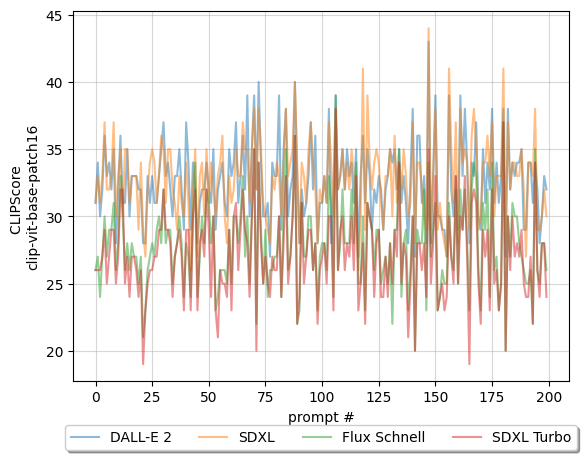

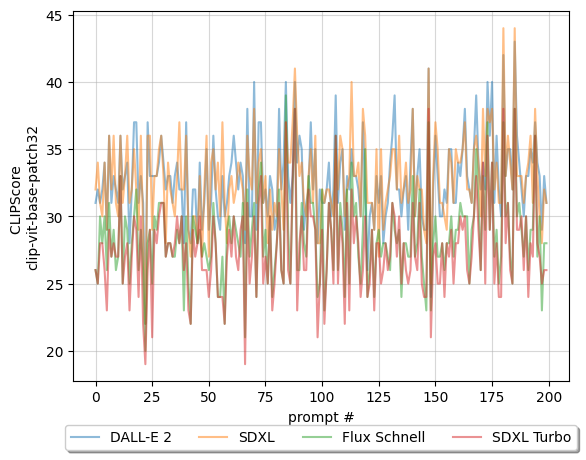

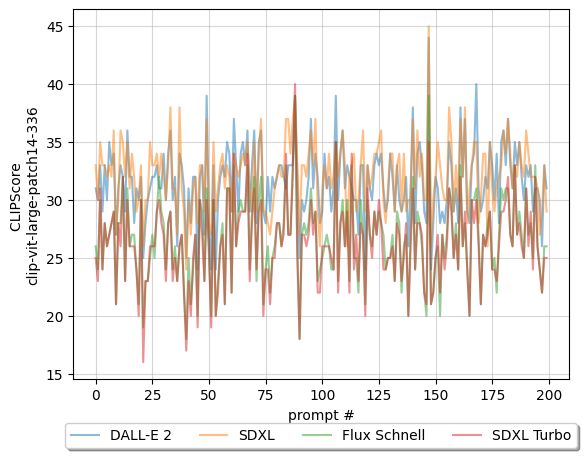

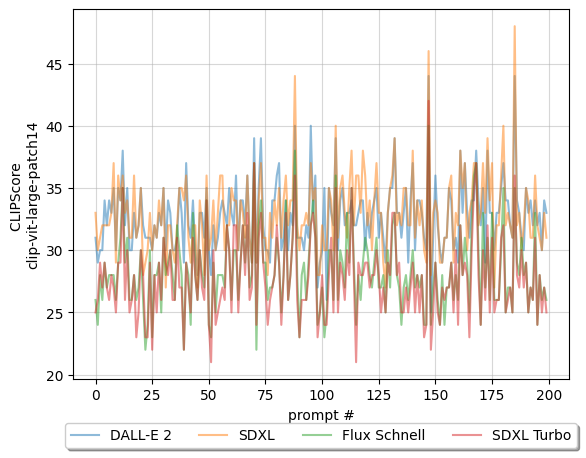

In [11]:
t2IModelList = ['DALL-E 2', 'SDXL', 'Flux Schnell', 'SDXL Turbo']
clipMetricList = ['clip-vit-base-patch16', 'clip-vit-base-patch32', 'clip-vit-large-patch14-336', 'clip-vit-large-patch14']

for modelIndex in range(len(t2IModelList)):
    linePlot(t2IModelList,
             clipMetricList,
             [dictClipScoreDALLE, dictClipScoreSDXL, dictClipScoreFluxSchnell, dictClipScoreSDXLTurbo],
             modelIndex)

In [12]:
'''
for i in range(4):
    plt.plot(range(len(prompt_list)), 
             dictValuesClipScoreSDXL[i],
             color=colors[i],
             alpha=0.5,
             label=dictKeysClipScoreSDXL[i])
    #break
plt.grid(alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.title('CLIPScore vs prompt #')
plt.ylabel('CLIPScore')
plt.xlabel('prompt #')
plt.savefig(input.split('/')[-1]+'_line_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.savefig(input.split('/')[-1]+'_line_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
'''

"\nfor i in range(4):\n    plt.plot(range(len(prompt_list)), \n             dictValuesClipScoreSDXL[i],\n             color=colors[i],\n             alpha=0.5,\n             label=dictKeysClipScoreSDXL[i])\n    #break\nplt.grid(alpha=0.5)\nplt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)\nplt.title('CLIPScore vs prompt #')\nplt.ylabel('CLIPScore')\nplt.xlabel('prompt #')\nplt.savefig(input.split('/')[-1]+'_line_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)\nplt.savefig(input.split('/')[-1]+'_line_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)\n"

# Scatter plot (same clip metric across T2I models)

In [13]:
def scatterPlot(t2IModelList, clipMetricList, listOfDictionaries, modelIndex):
    for metricIndex in range(numberOfClipVariants):
        #print(list(listOfDictionaries[metricIndex].keys())[modelIndex])
        #print(t2IModelList[metricIndex])
        #print(list(listOfDictionaries[modelIndex].values())[metricIndex])
        
        plt.scatter(range(len(prompt_list)),
                 list(listOfDictionaries[modelIndex].values())[metricIndex],
                 label=t2IModelList[metricIndex],
                 s=5,
                 alpha=0.5
                 )
        plt.grid(alpha=0.5)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
        #plt.title('CLIPScore vs prompt #')
        plt.ylabel('CLIPScore \n'+list(listOfDictionaries[modelIndex].keys())[modelIndex].split('/')[-1])
        plt.xlabel('prompt #')
    #print(list(listOfDictionaries[modelIndex].keys())[metricIndex].split('/')[-1]+'_line_plot.png')
    fileName = clipMetricList[modelIndex]
    plt.savefig(fileName+'_scatter_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.savefig(fileName+'_scatter_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()

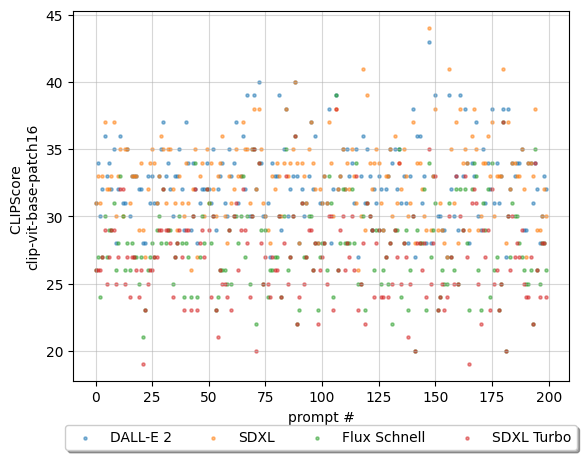

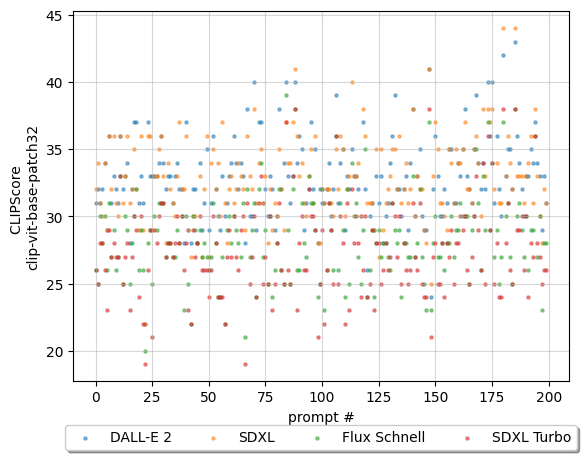

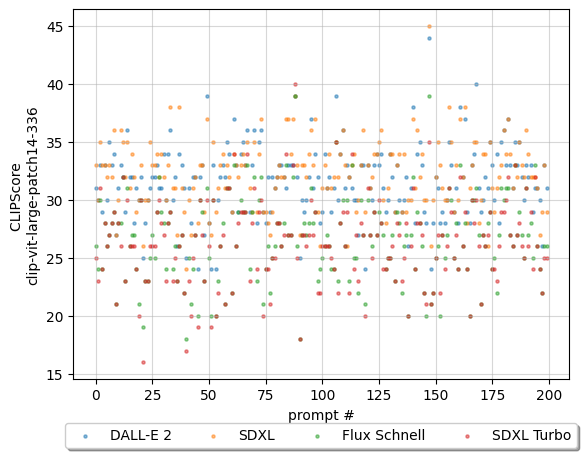

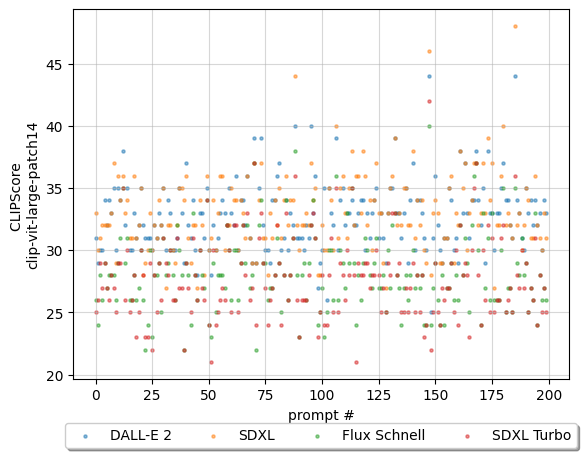

In [14]:
t2IModelList = ['DALL-E 2', 'SDXL', 'Flux Schnell', 'SDXL Turbo']
clipMetricList = ['clip-vit-base-patch16', 'clip-vit-base-patch32', 'clip-vit-large-patch14-336', 'clip-vit-large-patch14']

for modelIndex in range(len(t2IModelList)):
    scatterPlot(t2IModelList,
             clipMetricList,
             [dictClipScoreDALLE, dictClipScoreSDXL, dictClipScoreFluxSchnell, dictClipScoreSDXLTurbo],
             modelIndex)

In [15]:
'''
for i in range(len(clipScoreDictionary)):
    plt.scatter(prompt_length, 
                clipScoreDictionaryValues[i],
                color=colors[i],
                alpha=0.5,
                s=10,
                label=clipScoreDictionaryKeys[i])
plt.grid(alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.title('CLIPScore vs Prompt length')
plt.ylabel('CLIPScore')
#plt.xticks(range(0, max(prompt_length)))
plt.xlabel('prompts length')
plt.savefig(input.split('/')[-1]+'_scatter_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.savefig(input.split('/')[-1]+'_scatter_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
'''

"\nfor i in range(len(clipScoreDictionary)):\n    plt.scatter(prompt_length, \n                clipScoreDictionaryValues[i],\n                color=colors[i],\n                alpha=0.5,\n                s=10,\n                label=clipScoreDictionaryKeys[i])\nplt.grid(alpha=0.5)\nplt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)\nplt.title('CLIPScore vs Prompt length')\nplt.ylabel('CLIPScore')\n#plt.xticks(range(0, max(prompt_length)))\nplt.xlabel('prompts length')\nplt.savefig(input.split('/')[-1]+'_scatter_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)\nplt.savefig(input.split('/')[-1]+'_scatter_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)\n"

# Histogram

In [16]:
def histogramPlot(t2IModelList, clipMetricList, listOfDictionaries, modelIndex):
    # Define the custom bin width
    bin_width = 2
    
    # Generate bin edges based on the minimum and maximum of all data
    min_edge = min(min(data) for data in list(listOfDictionaries[modelIndex].values()))
    max_edge = max(max(data) for data in list(listOfDictionaries[modelIndex].values()))
    bin_edges = np.arange(min_edge, max_edge + bin_width, bin_width)
    
    for metricIndex in range(numberOfClipVariants):
        #print(list(listOfDictionaries[metricIndex].keys())[modelIndex])
        #print(t2IModelList[metricIndex])
        #print(list(listOfDictionaries[modelIndex].values())[metricIndex])
        
        counts, bins, patches = plt.hist(list(listOfDictionaries[modelIndex].values())[metricIndex], 
                                         bins=bin_edges, 
                                         edgecolor='black',
                                         color=colors[metricIndex],
                                         alpha=0.5,
                                         label=t2IModelList[metricIndex])
        #Y AXIS SHOULD BE THE COUNT OF THE OCCURENCES AND THE X AXIS SHOULD BE THE CLIP SCORE INTERVALS
        # Connect the tops of the bins
        bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate the center of each bin
        plt.plot(bin_centers,
                 counts,
                 alpha=0.75,
                 color=colors[metricIndex],
                 linestyle='--',
                 marker='x',
                 label=t2IModelList[metricIndex])
    #print(list(listOfDictionaries[modelIndex].keys())[metricIndex].split('/')[-1]+'_line_plot.png')
    fileName = clipMetricList[modelIndex]
    plt.grid(alpha=0.5)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
    plt.title('Distribution of CLIPScore '+ list(listOfDictionaries[modelIndex].keys())[modelIndex].split('/')[-1])
    plt.ylabel('Count')
    plt.xlabel('Prompt Length')
    plt.savefig(fileName+'_histogram_plot.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.savefig(fileName+'_histogram_plot.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()

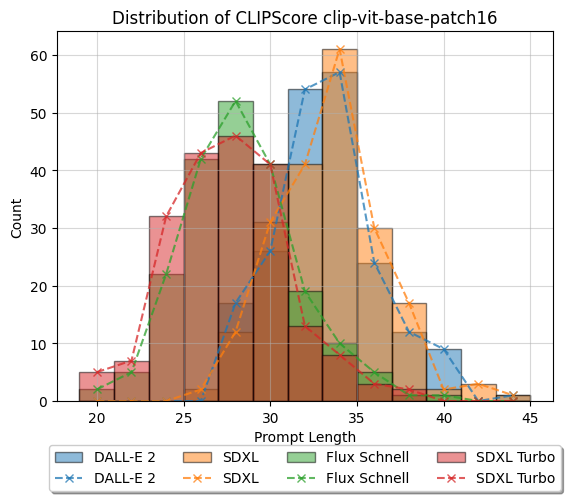

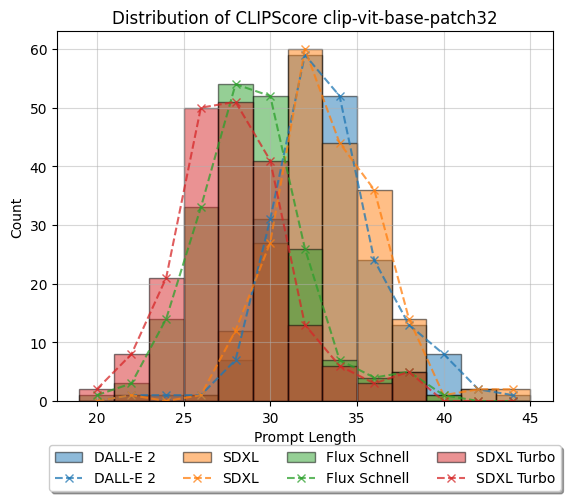

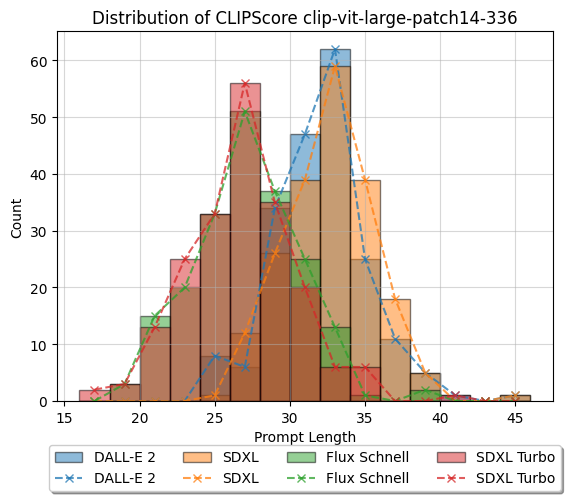

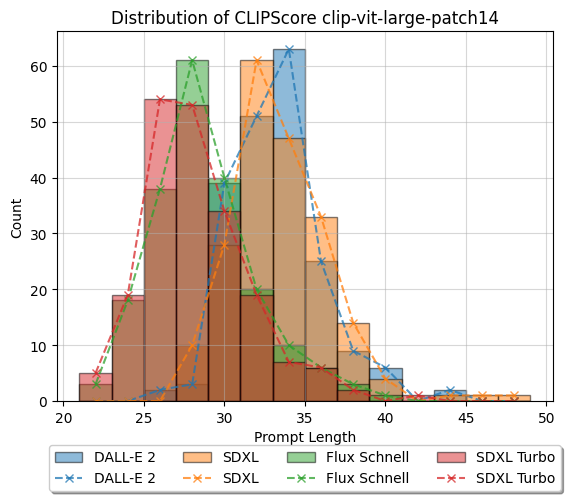

In [17]:
t2IModelList = ['DALL-E 2', 'SDXL', 'Flux Schnell', 'SDXL Turbo']
clipMetricList = ['clip-vit-base-patch16', 'clip-vit-base-patch32', 'clip-vit-large-patch14-336', 'clip-vit-large-patch14']

for modelIndex in range(len(t2IModelList)):
    histogramPlot(t2IModelList,
                  clipMetricList,
                  [dictClipScoreDALLE, dictClipScoreSDXL, dictClipScoreFluxSchnell, dictClipScoreSDXLTurbo],
                  modelIndex)

In [18]:
'''
# Define the custom bin width
bin_width = 2

# Generate bin edges based on the minimum and maximum of all data
min_edge = min(min(data) for data in clipScoreDictionaryValues)
max_edge = max(max(data) for data in clipScoreDictionaryValues)
bin_edges = np.arange(min_edge, max_edge + bin_width, bin_width)

for i in range(len(clipScoreDictionary)):# Plot histogram
    counts, bins, patches = plt.hist(clipScoreDictionaryValues[i], 
                                     bins=bin_edges, 
                                     edgecolor='black',
                                     color=colors[i],
                                     alpha=0.5,
                                     label=clipScoreDictionaryKeys[i])
#Y AXIS SHOULD BE THE COUNT OF THE OCCURENCES AND THE X AXIS SHOULD BE THE CLIP SCORE INTERVALS
    # Connect the tops of the bins
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate the center of each bin
    plt.plot(bin_centers,
             counts,
             alpha=0.75,
             color=colors[i],
             linestyle='--',
             marker='x',
             label=clipScoreDictionaryKeys[i])
plt.grid(alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.title('Distribution of CLIPScore')
plt.ylabel('Count')
plt.xlabel('CLIPScore')
plt.savefig(input.split('/')[-1]+'_histogram.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.savefig(input.split('/')[-1]+'_histogram.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
print('counts sum: ', sum(counts))
print('counts: ', counts)
'''

"\n# Define the custom bin width\nbin_width = 2\n\n# Generate bin edges based on the minimum and maximum of all data\nmin_edge = min(min(data) for data in clipScoreDictionaryValues)\nmax_edge = max(max(data) for data in clipScoreDictionaryValues)\nbin_edges = np.arange(min_edge, max_edge + bin_width, bin_width)\n\nfor i in range(len(clipScoreDictionary)):# Plot histogram\n    counts, bins, patches = plt.hist(clipScoreDictionaryValues[i], \n                                     bins=bin_edges, \n                                     edgecolor='black',\n                                     color=colors[i],\n                                     alpha=0.5,\n                                     label=clipScoreDictionaryKeys[i])\n#Y AXIS SHOULD BE THE COUNT OF THE OCCURENCES AND THE X AXIS SHOULD BE THE CLIP SCORE INTERVALS\n    # Connect the tops of the bins\n    bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate the center of each bin\n    plt.plot(bin_centers,\n             counts,\n    

In [19]:
'''
for i in range(len(clipScoreDictionary)):# Plot histogram
    counts, bins, patches = plt.hist(prompt_length, 
                                     bins=15, 
                                     edgecolor='black',
                                     color=colors[0],
                                     alpha=0.5,
                                     #label=clipScoreDictionaryKeys[i]
                                    )
    #Y AXIS SHOULD BE THE COUNT OF THE OCCURENCES AND THE X AXIS SHOULD BE THE CLIP SCORE INTERVALS
    # Connect the tops of the bins
    #bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate the center of each bin
    #plt.plot(bin_centers,
    #         counts, 
    #         color=colors[i], 
    #         linestyle='--', 
    #         marker='x', 
    #         label=clipScoreDictionaryKeys[i])
plt.grid(alpha=0.5)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.title('Distribution of Prompt length')
plt.ylabel('Count')
plt.xlabel('Prompt Length')
plt.savefig(input.split('/')[-1]+'_prompt_length_histogram.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
plt.savefig(input.split('/')[-1]+'_prompt_length_histogram.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
'''

"\nfor i in range(len(clipScoreDictionary)):# Plot histogram\n    counts, bins, patches = plt.hist(prompt_length, \n                                     bins=15, \n                                     edgecolor='black',\n                                     color=colors[0],\n                                     alpha=0.5,\n                                     #label=clipScoreDictionaryKeys[i]\n                                    )\n    #Y AXIS SHOULD BE THE COUNT OF THE OCCURENCES AND THE X AXIS SHOULD BE THE CLIP SCORE INTERVALS\n    # Connect the tops of the bins\n    #bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate the center of each bin\n    #plt.plot(bin_centers,\n    #         counts, \n    #         color=colors[i], \n    #         linestyle='--', \n    #         marker='x', \n    #         label=clipScoreDictionaryKeys[i])\nplt.grid(alpha=0.5)\n#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)\nplt.title('Distribution of Promp

# Computation of the mean and the standard deviation of CLIPScore for the entire 200 images-prompt pair

In [20]:
meanList = []
stdList = []
listOfDictionaries = [dictClipScoreDALLE, dictClipScoreSDXL, dictClipScoreFluxSchnell, dictClipScoreSDXLTurbo]
#print([dictClipScoreDALLE, dictClipScoreSDXL, dictClipScoreFluxSchnell, dictClipScoreSDXLTurbo])
for i in range(len(listOfDictionaries)):
    print(list(listOfDictionaries[i].keys()))
    print(list(listOfDictionaries[i].values()))
    #print('xxxxxx')
    #list = [t.item() for t in list(listOfDictionaries[i].values())]
    for j in range(len(list(listOfDictionaries[i].values()))):
        mean = np.mean(list(listOfDictionaries[i].values())[j])
        meanList.append(mean)

        std = np.std(list(listOfDictionaries[i].values())[j])
        stdList.append(std)
        #meanList.append(np.mean(clipScoreDictionaryValues[i]))
        #stdList.append(np.std(clipScoreDictionaryValues[i]))
        print(mean, std, (std/mean))
    print('xxxx')
    #print(meanList[i], stdList[i])
    #break

['openai/clip-vit-base-patch16', 'openai/clip-vit-base-patch32', 'openai/clip-vit-large-patch14-336', 'openai/clip-vit-large-patch14']
[[tensor(31.), tensor(34.), tensor(30.), tensor(32.), tensor(36.), tensor(33.), tensor(34.), tensor(32.), tensor(35.), tensor(28.), tensor(32.), tensor(36.), tensor(31.), tensor(31.), tensor(35.), tensor(30.), tensor(33.), tensor(33.), tensor(33.), tensor(32.), tensor(32.), tensor(28.), tensor(28.), tensor(33.), tensor(31.), tensor(33.), tensor(31.), tensor(31.), tensor(33.), tensor(35.), tensor(37.), tensor(33.), tensor(34.), tensor(32.), tensor(30.), tensor(33.), tensor(33.), tensor(35.), tensor(32.), tensor(29.), tensor(37.), tensor(34.), tensor(29.), tensor(34.), tensor(32.), tensor(28.), tensor(31.), tensor(32.), tensor(32.), tensor(34.), tensor(32.), tensor(31.), tensor(35.), tensor(29.), tensor(32.), tensor(33.), tensor(34.), tensor(31.), tensor(30.), tensor(35.), tensor(33.), tensor(34.), tensor(37.), tensor(31.), tensor(33.), tensor(36.), tenso